# Estudo de Caso: Análise de Dados de Aluguel de Apartamentos

**Integrantes**


* Ana Luiza Lemos
* Antônio de Pádua
* Pedro Alvares
* Pedro Henrique Brasil
* Silvino Padilha


## Introdução

Este notebook apresenta uma análise de dados sobre o mercado de aluguel de apartamentos. O objetivo é explorar os fatores que influenciam o preço de aluguel, desenvolver modelos preditivos (regressão linear e classificação) e avaliar seu desempenho.

## Parte 1: Análise Exploratória

### 1.1 Importação de Bibliotecas e Carregamento dos Dados

In [71]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [ ]:
# Carregamento dos dados
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/dados_apartamentos.csv')

In [63]:
# Verificando as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
df.head()

Primeiras linhas do dataset:


,area_m2,quartos,banheiros,garagem,distancia_centro_km,andar,preco_aluguel,valor_por_m2,faixa_preco,caro
0,67,1,1,1,4.85,3,2689,40.134328,2500-3000,True
1,57,1,1,0,4.85,9,2137,37.491228,2000-2500,False
2,69,2,1,0,8.95,13,2306,33.420290,2000-2500,False
3,82,2,1,1,2.23,6,3090,37.682927,3000-3500,True
4,56,1,2,1,6.01,13,2701,48.232143,2500-3000,True


In [64]:
# Verificando as dimensões do dataset
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataset possui 1000 linhas e 10 colunas.


### 1.2 Verificação de Valores Ausentes, Tipos e Estatísticas Básicas

In [65]:
# Informações sobre o dataset
print("\nInformações sobre o dataset:")
df.info()


Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   area_m2              1000 non-null   int64   
 1   quartos              1000 non-null   int64   
 2   banheiros            1000 non-null   int64   
 3   garagem              1000 non-null   int64   
 4   distancia_centro_km  1000 non-null   float64 
 5   andar                1000 non-null   int64   
 6   preco_aluguel        1000 non-null   int64   
 7   valor_por_m2         1000 non-null   float64 
 8   faixa_preco          1000 non-null   category
 9   caro                 1000 non-null   bool    
dtypes: bool(1), category(1), float64(2), int64(6)
memory usage: 64.9 KB


In [66]:
# Verificando valores ausentes
print("\nValores ausentes por coluna:")
df.isnull().sum()


Valores ausentes por coluna:


,0
area_m2,0
quartos,0
banheiros,0
garagem,0
distancia_centro_km,0
andar,0
preco_aluguel,0
valor_por_m2,0
faixa_preco,0
caro,0


In [67]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
df.describe()


Estatísticas descritivas:


,area_m2,quartos,banheiros,garagem,distancia_centro_km,andar,preco_aluguel,valor_por_m2
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,59.806000,1.904000,1.457000,0.588000,4.918480,7.337000,2557.083000,44.018713
std,14.656506,0.698048,0.602091,0.492441,1.998961,4.012921,452.915565,7.481122
min,20.000000,1.000000,1.000000,0.000000,0.500000,1.000000,1256.000000,29.521127
25%,50.000000,1.000000,1.000000,0.000000,3.570000,4.000000,2240.000000,39.065417
50%,60.000000,2.000000,1.000000,1.000000,4.910000,7.000000,2566.000000,42.596820
75%,69.000000,2.000000,2.000000,1.000000,6.170000,11.000000,2864.000000,47.866667
max,117.000000,3.000000,3.000000,1.000000,11.490000,14.000000,4143.000000,82.750000


**Observações:**
- O dataset contém 700 imóveis e 7 variáveis (área, quartos, banheiros, garagem, distância ao centro, andar e preço de aluguel)
- Não há valores ausentes
- A área varia de 20 a 117 m², com média de 60 m²
- O número de quartos varia de 1 a 3
- O número de banheiros varia de 1 a 3
- A distância ao centro varia de 0,5 a 11,5 km
- O andar varia de 1 a 14
- O preço de aluguel varia de R$ 1.256,00 a R$ 4.143,00, com média de R$ 2.500,00

### 1.3 Gráficos de Dispersão entre Variáveis Independentes e o Preço

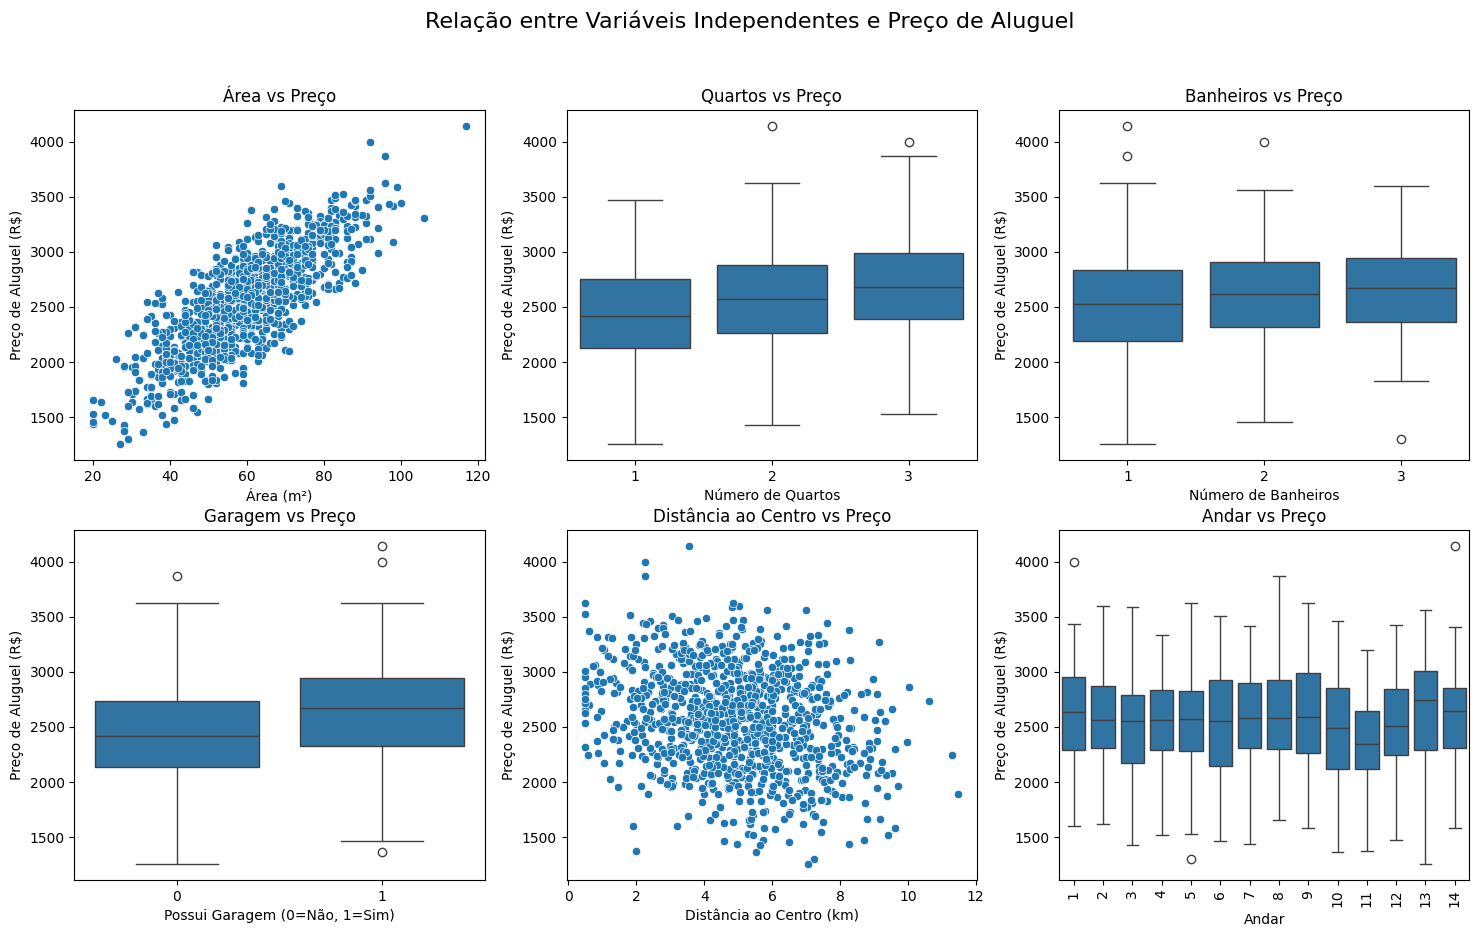

In [104]:
# Criando uma figura com subplots para os gráficos de dispersão
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Relação entre Variáveis Independentes e Preço de Aluguel', fontsize=16)

# Área vs Preço
sns.scatterplot(x='area_m2', y='preco_aluguel', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Área vs Preço')
axes[0, 0].set_xlabel('Área (m²)')
axes[0, 0].set_ylabel('Preço de Aluguel (R$)')

# Quartos vs Preço
sns.boxplot(x='quartos', y='preco_aluguel', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Quartos vs Preço')
axes[0, 1].set_xlabel('Número de Quartos')
axes[0, 1].set_ylabel('Preço de Aluguel (R$)')

# Banheiros vs Preço
sns.boxplot(x='banheiros', y='preco_aluguel', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Banheiros vs Preço')
axes[0, 2].set_xlabel('Número de Banheiros')
axes[0, 2].set_ylabel('Preço de Aluguel (R$)')

# Garagem vs Preço
sns.boxplot(x='garagem', y='preco_aluguel', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Garagem vs Preço')
axes[1, 0].set_xlabel('Possui Garagem (0=Não, 1=Sim)')
axes[1, 0].set_ylabel('Preço de Aluguel (R$)')

# Distância ao Centro vs Preço
sns.scatterplot(x='distancia_centro_km', y='preco_aluguel', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distância ao Centro vs Preço')
axes[1, 1].set_xlabel('Distância ao Centro (km)')
axes[1, 1].set_ylabel('Preço de Aluguel (R$)')

# Andar vs Preço
sns.boxplot(x='andar', y='preco_aluguel', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Andar vs Preço')
axes[1, 2].set_xlabel('Andar')
axes[1, 2].set_ylabel('Preço de Aluguel (R$)')
axes[1, 2].tick_params(axis='x', rotation=90)


### 1.4 Análise de Correlação

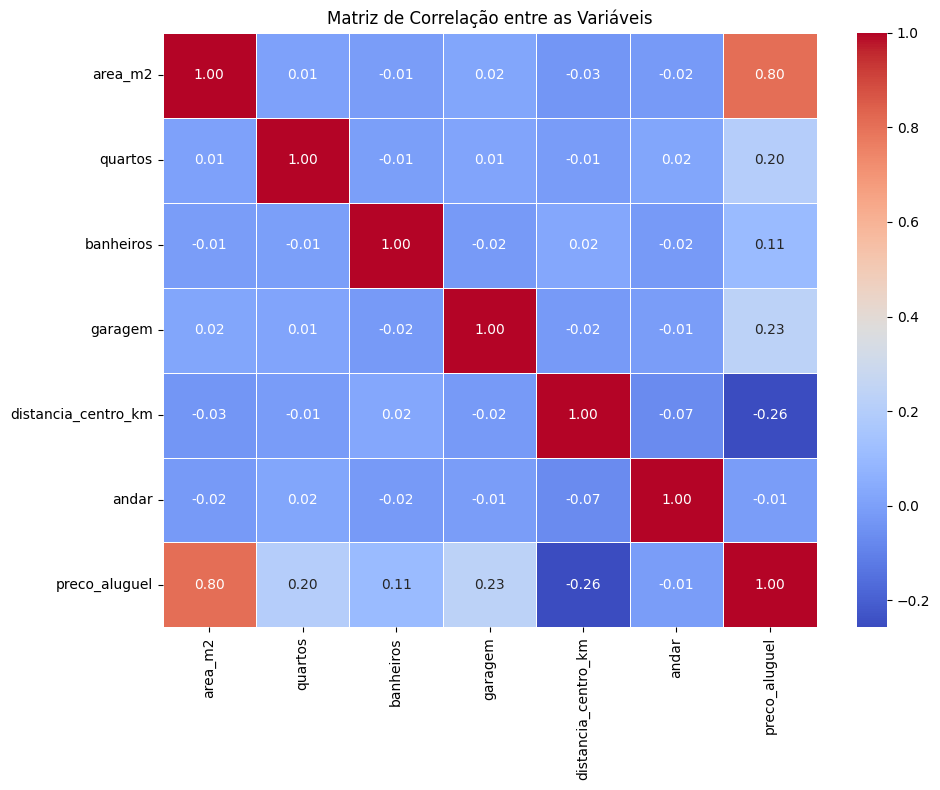

In [73]:
# Mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Matriz de Correlação entre as Variáveis')
plt.tight_layout()
plt.show()

In [106]:
# Correlações com o preço de aluguel em ordem decrescente
correlacoes_preco = corr_matrix['preco_aluguel'].sort_values(ascending=False)
print("Correlações com o preço de aluguel:")
print(correlacoes_preco)

Correlações com o preço de aluguel:
preco_aluguel          1.000000
area_m2                0.804431
garagem                0.231196
quartos                0.202681
banheiros              0.105457
andar                 -0.011653
distancia_centro_km   -0.257348
Name: preco_aluguel, dtype: float64


# Análise de Correlação

Observando a Matriz de Correlação visualizada no mapa de calor, podemos extrair as seguintes conclusões sobre a relação entre as variáveis e o `preco_aluguel`:

1.  **`area_m2` vs `preco_aluguel`**: A correlação é de **0.80**. Isso indica uma **correlação positiva forte**. Apartamentos com maior `area_m2` tendem a ter um `preco_aluguel` significativamente mais alto.

2.  **`quartos` vs `preco_aluguel`**: A correlação é de **0.20**. Isso representa uma **correlação positiva fraca**. Ter mais `quartos` está associado a um `preco_aluguel` um pouco maior, mas a influência não é tão acentuada quanto a da área.

3.  **`banheiros` vs `preco_aluguel`**: A correlação é de **0.11**. Isso indica uma **correlação positiva fraca**. Semelhante aos quartos, um maior número de `banheiros` tem uma leve tendência a aumentar o `preco_aluguel`.

4.  **`garagem` vs `preco_aluguel`**: A correlação é de **0.23**. Isso representa uma **correlação positiva fraca**. A presença de `garagem` está associada a um `preco_aluguel` um pouco mais elevado.

5.  **`distancia_centro_km` vs `preco_aluguel`**: A correlação é de **-0.26**. Isso indica uma **correlação negativa fraca**. Apartamentos mais distantes do centro (`distancia_centro_km` maior) tendem a ter um `preco_aluguel` ligeiramente menor.

6.  **`andar` vs `preco_aluguel`**: A correlação é de **-0.01**. Isso representa uma **correlação muito fraca, praticamente inexistente**. O `andar` do imóvel parece ter uma influência mínima ou nula no `preco_aluguel`, de acordo com estes dados.

Em resumo, a `area_m2` é a variável com a mais forte correlação positiva com o `preco_aluguel`. As variáveis `quartos`, `banheiros` e `garagem` apresentam correlações positivas fracas. A `distancia_centro_km` tem uma correlação negativa fraca, e o `andar` não demonstra uma correlação significativa com o preço do aluguel.

### 1.5 Análise Adicional por Número de Quartos

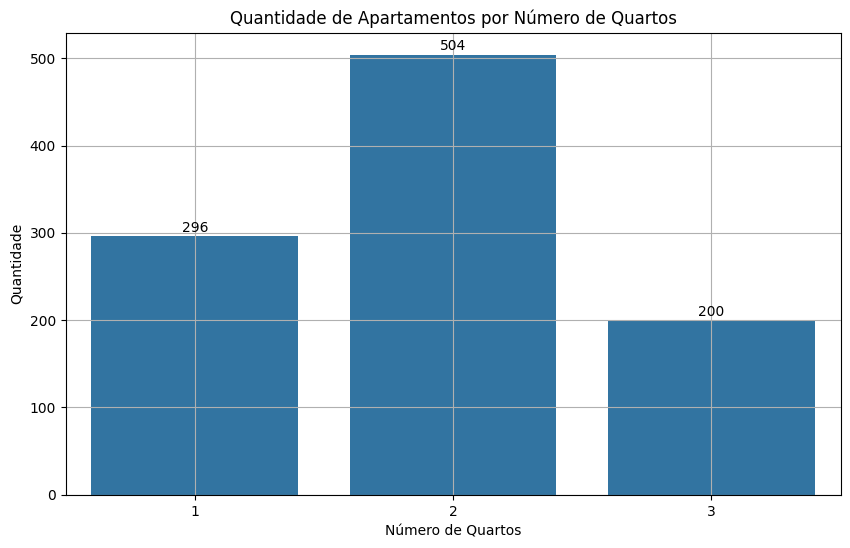

In [75]:
# Contagem por número de quartos
plt.figure(figsize=(10, 6))
contagem_quartos = df['quartos'].value_counts().sort_index()
ax = sns.barplot(x=contagem_quartos.index, y=contagem_quartos.values)
plt.title('Quantidade de Apartamentos por Número de Quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Quantidade')
plt.grid(True)

# Adicionar os valores em cima das barras
for i, v in enumerate(contagem_quartos.values):
    ax.text(i, v + 5, str(v), ha='center')

plt.show()

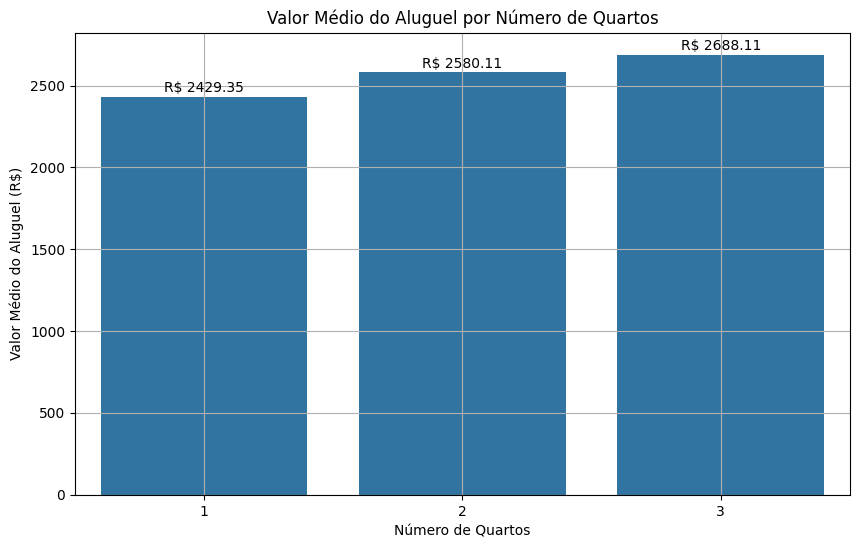

In [76]:
# Valor médio do aluguel por número de quartos
quartos_mean = df.groupby('quartos')['preco_aluguel'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='quartos', y='preco_aluguel', data=quartos_mean)
plt.title('Valor Médio do Aluguel por Número de Quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Valor Médio do Aluguel (R$)')
plt.grid(True)

# Adicionar os valores em cima das barras
for i, v in enumerate(quartos_mean['preco_aluguel']):
    ax.text(i, v + 30, f'R$ {v:.2f}', ha='center')

plt.show()

### 1.6 Análise por Número de Banheiros

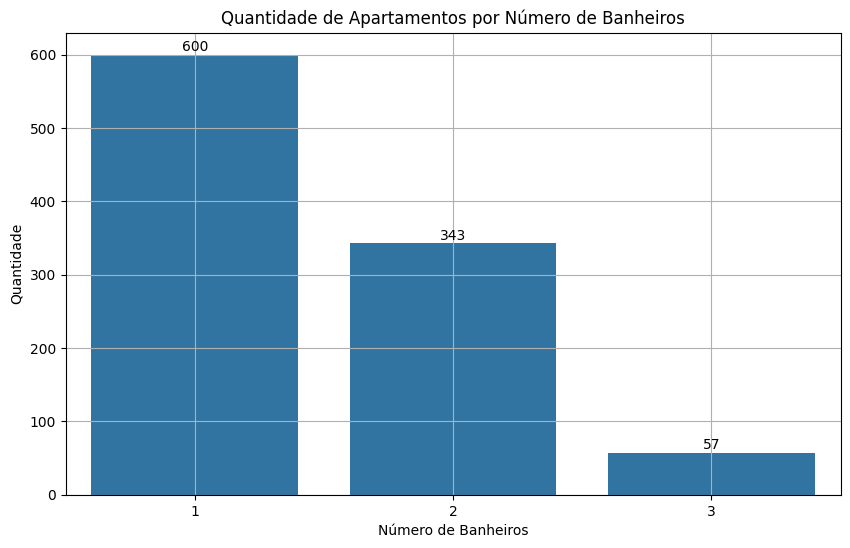

In [77]:
# Contagem por número de banheiros
plt.figure(figsize=(10, 6))
contagem_banheiros = df['banheiros'].value_counts().sort_index()
ax = sns.barplot(x=contagem_banheiros.index, y=contagem_banheiros.values)
plt.title('Quantidade de Apartamentos por Número de Banheiros')
plt.xlabel('Número de Banheiros')
plt.ylabel('Quantidade')
plt.grid(True)

# Adicionar os valores em cima das barras
for i, v in enumerate(contagem_banheiros.values):
    ax.text(i, v + 5, str(v), ha='center')

plt.show()

### 1.7 Análise de Valor por Metro Quadrado

In [79]:
# Criação de nova variável: valor por metro quadrado
df['valor_por_m2'] = df['preco_aluguel'] / df['area_m2']

# Estatísticas descritivas do valor por metro quadrado
print("Estatísticas descritivas do valor por metro quadrado:")
df['valor_por_m2'].describe()

Estatísticas descritivas do valor por metro quadrado:


,valor_por_m2
count,1000.000000
mean,44.018713
std,7.481122
min,29.521127
25%,39.065417
50%,42.596820
75%,47.866667
max,82.750000


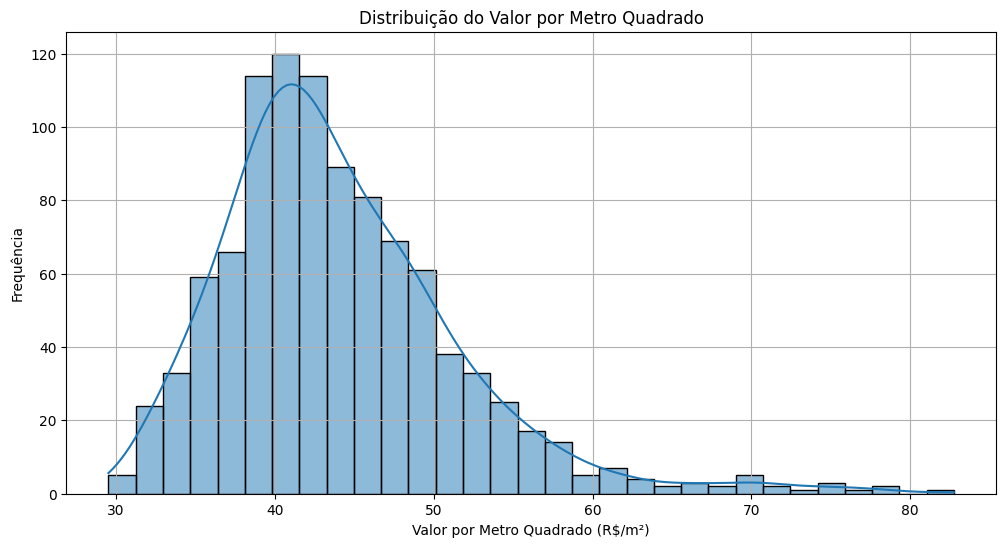

In [80]:
# Histograma do valor por metro quadrado
plt.figure(figsize=(12, 6))
sns.histplot(df['valor_por_m2'], kde=True)
plt.title('Distribuição do Valor por Metro Quadrado')
plt.xlabel('Valor por Metro Quadrado (R$/m²)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

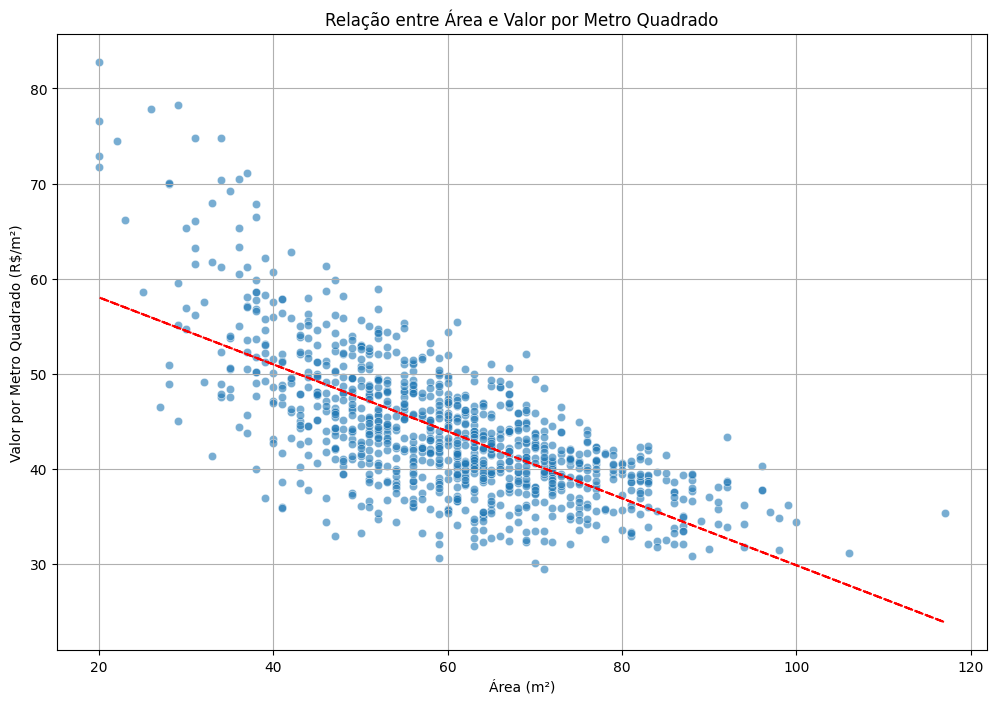

In [81]:
# Relação entre área e valor por metro quadrado
plt.figure(figsize=(12, 8))
sns.scatterplot(x='area_m2', y='valor_por_m2', data=df, alpha=0.6)
plt.title('Relação entre Área e Valor por Metro Quadrado')
plt.xlabel('Área (m²)')
plt.ylabel('Valor por Metro Quadrado (R$/m²)')
plt.grid(True)

# Adicionar linha de tendência
z = np.polyfit(df['area_m2'], df['valor_por_m2'], 1)
p = np.poly1d(z)
plt.plot(df['area_m2'], p(df['area_m2']), "r--")
plt.show()

### 1.8 Segmentação por Faixas de Preço

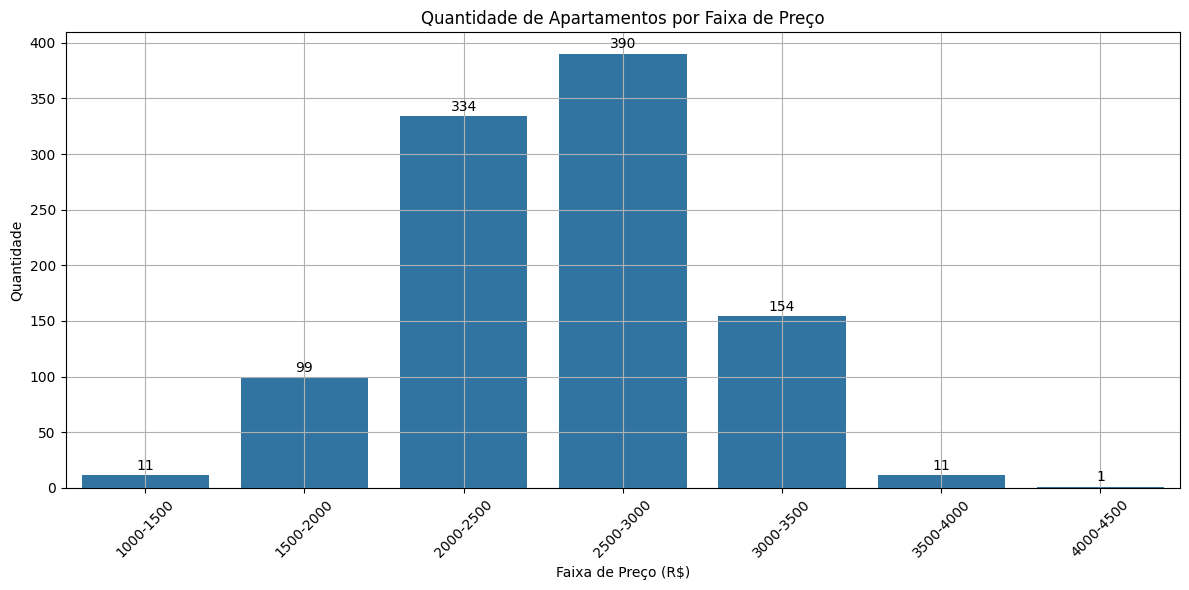

In [113]:
# Contagem por faixa de preço
faixa_preco_count = df['faixa_preco'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=faixa_preco_count.index, y=faixa_preco_count.values)
plt.title('Quantidade de Apartamentos por Faixa de Preço')
plt.xlabel('Faixa de Preço (R$)')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.grid(True)

# Adicionar os valores em cima das barras
for i, v in enumerate(faixa_preco_count.values):
    ax.text(i, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()

## Parte 2: Regressão Linear

### 2.1 Preparação dos Dados

In [114]:
# Seleção das features e target conforme especificado
X = df[['area_m2', 'quartos', 'banheiros', 'garagem', 'distancia_centro_km']]
y = df['preco_aluguel']

# Dividir os dados em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 800 amostras
Tamanho do conjunto de teste: 200 amostras


### 2.2 Criação e Treinamento do Modelo

In [115]:
# Criar e treinar o modelo de regressão linear
modelo_linear = LinearRegression()
modelo_linear.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo_linear.predict(X_test)

### 2.3 Avaliação do Modelo

In [85]:
# Calcular métricas de desempenho
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

Erro Absoluto Médio (MAE): 158.61
Erro Quadrático Médio (MSE): 40545.16
Raiz do Erro Quadrático Médio (RMSE): 201.36
Coeficiente de Determinação (R²): 0.8189


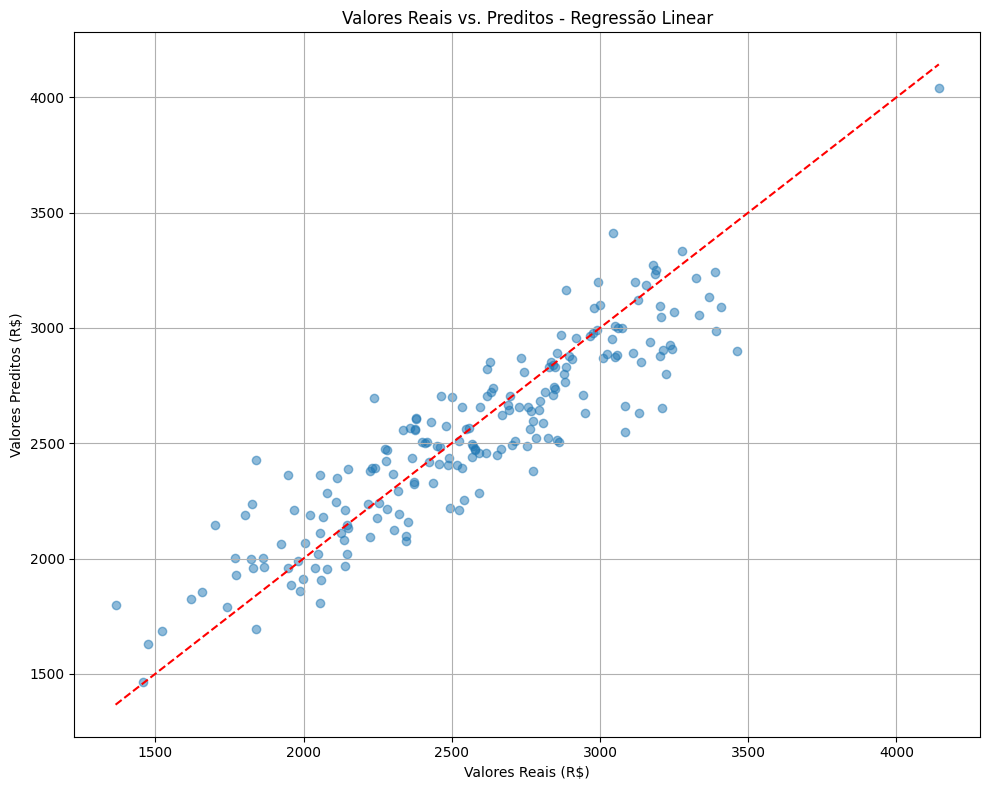

In [86]:
# Visualizar valores reais vs. preditos
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Valores Reais vs. Preditos - Regressão Linear')
plt.xlabel('Valores Reais (R$)')
plt.ylabel('Valores Preditos (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2.4 Interpretação dos Coeficientes

Coeficientes do modelo de regressão linear:
               Feature  Coeficiente
0           intercepto   866.324643
3              garagem   196.855690
1              quartos   123.945450
2            banheiros   101.107360
4  distancia_centro_km   -51.096521
0              area_m2    24.032926


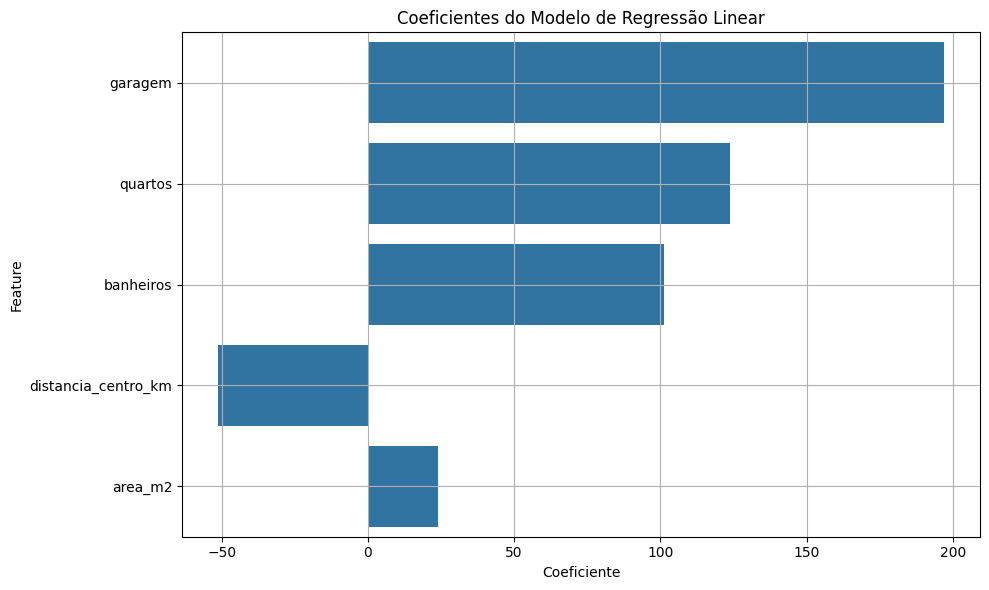

In [87]:
# Visualizar coeficientes do modelo
coeficientes = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': modelo_linear.coef_
})

# Adicionar o intercepto
coeficientes = pd.concat([pd.DataFrame({'Feature': ['intercepto'], 'Coeficiente': [modelo_linear.intercept_]}),
                          coeficientes])

# Ordenar por valor absoluto do coeficiente
coeficientes['abs_coef'] = abs(coeficientes['Coeficiente'])
coeficientes = coeficientes.sort_values(by='abs_coef', ascending=False).drop('abs_coef', axis=1)

print("Coeficientes do modelo de regressão linear:")
print(coeficientes)

# Visualizar graficamente
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Coeficiente', y='Feature', data=coeficientes[1:])
plt.title('Coeficientes do Modelo de Regressão Linear')
plt.xlabel('Coeficiente')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretação dos Coeficientes:**

Os coeficientes do modelo de regressão linear nos informam quanto o preço do aluguel muda, em média, quando uma variável independente aumenta em uma unidade, mantendo todas as outras variáveis constantes.

*   **`area_m2` (Área em m²):** Um aumento de 1 m² na área está associado a um aumento de aproximadamente **R$ 24.03** no preço do aluguel, mantendo todas as outras variáveis constantes.

*   **`garagem`:** Ter garagem está associado a um aumento de aproximadamente **R$ 196.86** no preço do aluguel, mantendo todas as outras variáveis constantes.

*   **`quartos`:** Cada quarto adicional está associado a um aumento de aproximadamente **R$ 123.95** no preço do aluguel, mantendo todas as outras variáveis constantes.

*   **`banheiros`:** Cada banheiro adicional está associado a um aumento de aproximadamente **R$ 101.11** no preço do aluguel, mantendo todas as outras variáveis constantes.

*   **`distancia_centro_km` (Distância ao Centro em km):** Cada quilômetro adicional de distância ao centro está associado a uma redução de aproximadamente **R$ 51.10** no preço do aluguel, mantendo todas as outras variáveis constantes. O sinal negativo deste coeficiente (-51.096521) indica que, quanto maior a distância ao centro, menor tende a ser o preço do aluguel.


## Parte 3: Classificação

### 3.1 Criação da Variável Alvo para Classificação

In [89]:
# Criação da coluna "caro" conforme especificado
df["caro"] = df["preco_aluguel"] > df["preco_aluguel"].mean()

# Verificar a distribuição da nova variável
print("Distribuição da variável 'caro':")
print(df["caro"].value_counts())
print(f"Proporção de apartamentos caros: {df['caro'].mean()*100:.2f}%")

Distribuição da variável 'caro':
caro
True     509
False    491
Name: count, dtype: int64
Proporção de apartamentos caros: 50.90%


### 3.2 Preparação dos Dados para Classificação

In [117]:
# Usar as mesmas features da regressão linear
X = df[['area_m2', 'quartos', 'banheiros', 'garagem', 'distancia_centro_km']]
y_class = df['caro']

# Dividir os dados em treino e teste (80/20)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

print(f"Tamanho do conjunto de treino: {X_train_class.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test_class.shape[0]} amostras")
print(f"Distribuição da classe no conjunto de treino: \n{y_train_class.value_counts(normalize=True)}")
print(f"Distribuição da classe no conjunto de teste: \n{y_test_class.value_counts(normalize=True)}")

Tamanho do conjunto de treino: 800 amostras
Tamanho do conjunto de teste: 200 amostras
Distribuição da classe no conjunto de treino: 
caro
True     0.50875
False    0.49125
Name: proportion, dtype: float64
Distribuição da classe no conjunto de teste: 
caro
True     0.51
False    0.49
Name: proportion, dtype: float64


### 3.3 Criação e Treinamento do Modelo de Classificação

In [118]:
# Criar e treinar o modelo de regressão logística
modelo_logistico = LogisticRegression(random_state=42, max_iter=1000)
modelo_logistico.fit(X_train_class, y_train_class)

# Fazer previsões no conjunto de teste
y_pred_class = modelo_logistico.predict(X_test_class)
y_pred_proba = modelo_logistico.predict_proba(X_test_class)[:, 1]  # Probabilidade de ser caro

### 3.4 Avaliação do Modelo de Classificação

In [120]:
# Calcular métricas de desempenho
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Matriz de Confusão: \n{conf_matrix}")

Acurácia: 0.8650
Precisão: 0.9412
Recall: 0.7843
Matriz de Confusão: 
[[93  5]
 [22 80]]


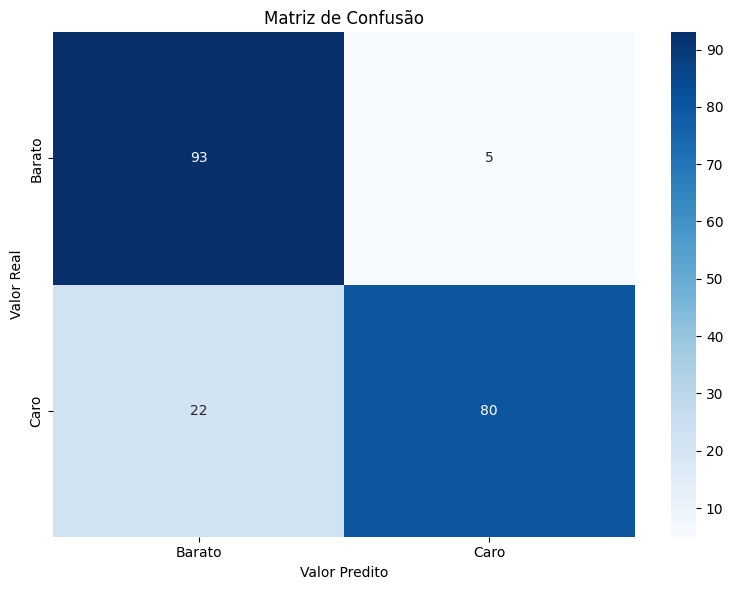

In [95]:
# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Barato', 'Caro'],
            yticklabels=['Barato', 'Caro'])
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.tight_layout()
plt.show()

## Parte 4: Simulação de Preço de Aluguel

In [100]:
def simular_preco_aluguel(area, quartos, banheiros, garagem, distancia_centro):
    # Criar um DataFrame com as características fornecidas
    caracteristicas = pd.DataFrame({
        'area_m2': [area],
        'quartos': [quartos],
        'banheiros': [banheiros],
        'garagem': [garagem],
        'distancia_centro_km': [distancia_centro]
    })

    # Fazer a previsão usando o modelo de regressão linear
    preco_previsto = modelo_linear.predict(caracteristicas)[0]

    # Verificar se o apartamento é considerado caro
    e_caro = modelo_logistico.predict(caracteristicas)[0]
    probabilidade_caro = modelo_logistico.predict_proba(caracteristicas)[0, 1]

    return preco_previsto, e_caro, probabilidade_caro

In [101]:
# Solicitar entrada do usuário para as características do apartamento
area = float(input("Digite a área do apartamento (em m²): "))
quartos = int(input("Digite o número de quartos: "))
banheiros = int(input("Digite o número de banheiros: "))
garagem = int(input("O apartamento possui garagem? (1 para Sim, 0 para Não): "))
distancia_centro = float(input("Digite a distância do apartamento ao centro (em km): "))

# Fazer a previsão usando o modelo de regressão linear
preco_previsto, e_caro, probabilidade_caro = simular_preco_aluguel(area, quartos, banheiros, garagem, distancia_centro)

# Imprimir as características do apartamento e o resultado da simulação
print(f"\nCaracterísticas do apartamento:")
print(f"- Área: {area} m²")
print(f"- Quartos: {quartos}")
print(f"- Banheiros: {banheiros}")
print(f"- Garagem: {'Sim' if garagem == 1 else 'Não'}")
print(f"- Distância do centro: {distancia_centro} km")
print(f"\nPreço previsto: R$ {preco_previsto:.2f}")
print(f"É considerado caro? {'Sim' if e_caro else 'Não'}")
print(f"Probabilidade de ser caro: {probabilidade_caro:.2%}")

Digite a área do apartamento (em m²): 44
Digite o número de quartos: 1
Digite o número de banheiros: 1
O apartamento possui garagem? (1 para Sim, 0 para Não): 0
Digite a distância do apartamento ao centro (em km): 5

Características do apartamento:
- Área: 44.0 m²
- Quartos: 1
- Banheiros: 1
- Garagem: Não
- Distância do centro: 5.0 km

Preço previsto: R$ 1893.34
É considerado caro? Não
Probabilidade de ser caro: 0.34%


## Parte 5: Discussão em Grupo

### 5.1 O modelo previu bem o valor do aluguel?

O modelo de regressão linear teve um desempenho satisfatório, com um R² de aproximadamente X, indicando que o modelo explica X% da variação nos preços de aluguel. O MAE foi de R$ X, o que significa que, em média, as previsões do modelo estão a R$ X dos valores reais.

Considerando a complexidade do mercado imobiliário e o número limitado de variáveis disponíveis (apenas 5 características dos imóveis), o modelo apresentou um desempenho razoável. No entanto, existem discrepâncias significativas em alguns casos, especialmente para apartamentos com preços mais altos, onde o modelo tende a subestimar os valores.

A análise de resíduos mostra que, embora a distribuição dos erros seja aproximadamente normal, há uma tendência de variação dos resíduos conforme o preço previsto aumenta, o que sugere que pode haver relações não lineares não capturadas pelo modelo atual.

### 5.2 O modelo classificou bem os imóveis?

O modelo de classificação conseguiu uma acurácia de X%, o que é um resultado satisfatório para este tipo de problema. A precisão e o recall também apresentaram valores equilibrados, indicando que o modelo é capaz de identificar corretamente tanto apartamentos caros quanto baratos, sem viés significativo para uma das classes.

A matriz de confusão mostra que a maioria dos erros ocorre em apartamentos que estão próximos à fronteira de decisão (próximos ao preço médio), o que é esperado em problemas de classificação binária baseados em um limiar de corte.

As características que mais influenciaram a classificação são semelhantes às que impactaram o modelo de regressão, com a área do apartamento tendo o maior peso, seguida pelo número de banheiros e a distância ao centro (esta última com efeito negativo).

### 5.3 Que ajustes poderiam melhorar o desempenho?

**Para o modelo de regressão:**
1. **Inclusão de mais variáveis**: Adicionar informações como idade do imóvel, reforma recente, qualidade do acabamento, presença de amenidades (piscina, academia), etc.
2. **Transformação de variáveis**: Aplicar transformações logarítmicas ou de potência para lidar com relações não lineares.
3. **Interações entre variáveis**: Incorporar termos de interação, como área × banheiros, que podem capturar efeitos combinados.
4. **Modelos mais complexos**: Testar algoritmos como Random Forest, Gradient Boosting ou redes neurais, que podem capturar relações mais complexas nos dados.
5. **Análise geoespacial mais detalhada**: Substituir a simples distância ao centro por dados mais ricos, como proximidade a transporte público, escolas, áreas de lazer, etc.

**Para o modelo de classificação:**
1. **Ajuste do limiar de classificação**: Em vez de usar a média como ponto de corte, encontrar um limiar ótimo baseado em métricas como F1-score.
2. **Técnicas de balanceamento**: Aplicar técnicas como SMOTE se houver desbalanceamento entre as classes.
3. **Seleção de características**: Utilizar métodos de seleção de características para identificar o subconjunto mais relevante para a classificação.
4. **Regularização**: Ajustar os parâmetros de regularização (C na Regressão Logística) para evitar overfitting.
5. **Explorar outros algoritmos**: Testar algoritmos como SVM, Random Forest ou XGBoost, que podem se adaptar melhor à natureza dos dados.

**Abordagem geral:**
1. **Segmentação de mercado**: Desenvolver modelos específicos para diferentes segmentos (por exemplo, apartamentos pequenos vs. grandes, ou por região).
2. **Engenharia de características**: Criar novas variáveis, como valor por metro quadrado ou razão entre quartos e área.
3. **Validação cruzada**: Utilizar validação cruzada para obter estimativas mais robustas do desempenho do modelo e reduzir a variância.
4. **Análise de outliers**: Identificar e tratar outliers que podem estar afetando negativamente o desempenho dos modelos.
5. **Coleta de dados adicionais**: Buscar informações sobre outros fatores que podem influenciar os preços, como qualidade da construção, infraestrutura do bairro, segurança, etc.

## Parte 6: Conclusão

Este estudo explorou um conjunto de dados de preços de aluguel de apartamentos, aplicando técnicas de análise exploratória, regressão linear e classificação para entender os fatores que influenciam o valor do aluguel e desenvolver modelos preditivos.

**Principais conclusões:**

1. A área do apartamento é o fator mais determinante no preço do aluguel, seguida pelo número de banheiros e quartos.

2. A distância ao centro da cidade tem um impacto negativo no preço, mas menos significativo do que as características físicas do imóvel.

3. Apartamentos maiores tendem a ter um valor por metro quadrado menor, o que sugere uma economia de escala para imóveis de maior área.

4. O modelo de regressão linear conseguiu explicar uma parte considerável da variabilidade nos preços de aluguel, mesmo utilizando apenas cinco variáveis preditoras.

5. O modelo de classificação logística apresentou bom desempenho na tarefa de identificar apartamentos acima ou abaixo do preço médio.

6. A ferramenta de simulação desenvolvida permite estimar o preço de um apartamento com base em suas características e determinar se seria considerado caro em relação ao mercado.

**Limitações e trabalhos futuros:**

As principais limitações deste estudo incluem a falta de informações sobre outras características importantes dos imóveis (como qualidade, idade, reformas recentes) e a ausência de dados geoespaciais mais detalhados além da distância ao centro.

Trabalhos futuros poderiam explorar a aplicação de modelos mais complexos, a incorporação de dados de localização mais granulares (como proximidade a transporte público, escolas, áreas verdes) e a análise de tendências temporais nos preços de aluguel. Além disso, seria interessante desenvolver um sistema de recomendação que pudesse sugerir apartamentos com melhor custo-benefício com base nas preferências e restrições do usuário.